In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns  # for plot styling
%matplotlib inline

In [ ]:
path_train=r'/content/drive/MyDrive/Project & Research /ISCAS-similarity/Clean Datased/final.csv'
Docset1=pd.read_csv(path_train)
Docset1.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
#Docset1=Docset1.drop(columns=['Unnamed: 0'])
Docset1

,description_x,description_y,Check,"Dx,Dy",Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
0,first trust dow jones internet,first trust dj internet idx,1,"['first trust dow jones internet', 'first trus...",0.600000,0.135335,0.428571,0.431613,0.344316,0.347953
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,1,"['schwab intl large company index etf', 'schwa...",0.680414,0.106878,0.500000,0.527072,0.378117,0.348840
2,vanguard small cap index adm,vanguard small-cap index fund inst,0,"['vanguard small cap index adm', 'vanguard sma...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,1,['duke energy corp new com new isin #us4 sedol...,0.833333,0.135335,0.666667,0.716812,0.471149,0.587291
4,visa inc class a,visa inc.,1,"['visa inc class a', 'visa inc.']",0.816497,0.367879,0.666667,0.709297,0.466499,0.473355
...,...,...,...,...,...,...,...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,1,"['delta air lines inc com', 'delta air lines i...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
2138,cognizant tech solutns a,cognizant tech solutions corp,1,"['cognizant tech solutns a', 'cognizant tech s...",0.577350,0.176921,0.400000,0.411207,0.337846,0.286638
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,0,['pimco investment grade corporate bond fund -...,0.338062,0.059106,0.200000,0.206137,0.283640,0.136641
2140,eli lilly & co com,lilly eli &co com npv,1,"['eli lilly & co com', 'lilly eli &co com npv']",0.894427,0.367879,0.800000,0.818180,0.547154,0.635489


In [ ]:
Docset1.keys()

Index(['description_x', 'description_y', 'Check', 'Dx,Dy', 'Cos_sim_bow',
       'Shepard_sim_bow', 'Min_Max_sim_bow', 'Cos_sim_TI', 'Shepard_sim_TI',
       'Min_Max_sim_TI'],
      dtype='object')

In [ ]:
Docset1

,description_x,description_y,Check,"Dx,Dy",Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
0,first trust dow jones internet,first trust dj internet idx,1,"['first trust dow jones internet', 'first trus...",0.600000,0.135335,0.428571,0.431613,0.344316,0.347953
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,1,"['schwab intl large company index etf', 'schwa...",0.680414,0.106878,0.500000,0.527072,0.378117,0.348840
2,vanguard small cap index adm,vanguard small-cap index fund inst,0,"['vanguard small cap index adm', 'vanguard sma...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,1,['duke energy corp new com new isin #us4 sedol...,0.833333,0.135335,0.666667,0.716812,0.471149,0.587291
4,visa inc class a,visa inc.,1,"['visa inc class a', 'visa inc.']",0.816497,0.367879,0.666667,0.709297,0.466499,0.473355
...,...,...,...,...,...,...,...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,1,"['delta air lines inc com', 'delta air lines i...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
2138,cognizant tech solutns a,cognizant tech solutions corp,1,"['cognizant tech solutns a', 'cognizant tech s...",0.577350,0.176921,0.400000,0.411207,0.337846,0.286638
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,0,['pimco investment grade corporate bond fund -...,0.338062,0.059106,0.200000,0.206137,0.283640,0.136641
2140,eli lilly & co com,lilly eli &co com npv,1,"['eli lilly & co com', 'lilly eli &co com npv']",0.894427,0.367879,0.800000,0.818180,0.547154,0.635489


In [ ]:
Data_0=Docset1.loc[Docset1['Check'] == False]
Data_1=Docset1.loc[Docset1['Check'] == True]

In [ ]:
Data_0

,description_x,description_y,Check,"Dx,Dy",Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
2,vanguard small cap index adm,vanguard small-cap index fund inst,0,"['vanguard small cap index adm', 'vanguard sma...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
14,vanguard total bond market index fund admiral ...,vanguard total bond market idx instl pls,0,['vanguard total bond market index fund admira...,0.534522,0.070952,0.363636,0.368023,0.324894,0.273621
19,vanguard total bond market index admiral,vanguard bond index total mkt investor,0,"['vanguard total bond market index admiral', '...",0.666667,0.135335,0.500000,0.503103,0.369024,0.415720
22,russell gbl real estate securities cl s,vy clarion real estate port srv,0,"['russell gbl real estate securities cl s', 'v...",0.333333,0.059106,0.200000,0.201993,0.282710,0.151015
23,vanguard short-term investment-grade fund admi...,vanguard short-term invest-grade,0,['vanguard short-term investment-grade fund ad...,0.632456,0.106878,0.444444,0.474331,0.358672,0.301874
...,...,...,...,...,...,...,...,...,...,...
2113,pimco fds income fund cl d,pimco income administrative,0,"['pimco fds income fund cl d', 'pimco income a...",0.516398,0.135335,0.333333,0.356300,0.321539,0.221607
2119,blackrock high yield bond portfolio svc,blackrock hi yield bd ptf inst,0,"['blackrock high yield bond portfolio svc', 'b...",0.333333,0.059106,0.200000,0.201993,0.282710,0.151015
2121,vanguard small-cap index fund admiral,vang sm cap idx inst,0,"['vanguard small-cap index fund admiral', 'van...",0.182574,0.049787,0.100000,0.101631,0.261734,0.069700
2123,pimco total return fd cl c,fund: pimco total return admin,0,"['pimco total return fd cl c', 'fund: pimco to...",0.600000,0.135335,0.428571,0.431613,0.344316,0.347953


In [ ]:
Data_1

,description_x,description_y,Check,"Dx,Dy",Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
0,first trust dow jones internet,first trust dj internet idx,1,"['first trust dow jones internet', 'first trus...",0.600000,0.135335,0.428571,0.431613,0.344316,0.347953
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,1,"['schwab intl large company index etf', 'schwa...",0.680414,0.106878,0.500000,0.527072,0.378117,0.348840
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,1,['duke energy corp new com new isin #us4 sedol...,0.833333,0.135335,0.666667,0.716812,0.471149,0.587291
4,visa inc class a,visa inc.,1,"['visa inc class a', 'visa inc.']",0.816497,0.367879,0.666667,0.709297,0.466499,0.473355
5,ford motor co new div: 0.600,ford motor co,1,"['ford motor co new div: 0.600', 'ford motor co']",0.707107,0.176921,0.500000,0.579739,0.399796,0.319450
...,...,...,...,...,...,...,...,...,...,...
2136,prudential jennison natural resources z,prudential jennison ^,1,"['prudential jennison natural resources z', 'p...",0.707107,0.243117,0.500000,0.579739,0.399796,0.319450
2137,delta air lines inc com,delta air lines inc dela new,1,"['delta air lines inc com', 'delta air lines i...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
2138,cognizant tech solutns a,cognizant tech solutions corp,1,"['cognizant tech solutns a', 'cognizant tech s...",0.577350,0.176921,0.400000,0.411207,0.337846,0.286638
2140,eli lilly & co com,lilly eli &co com npv,1,"['eli lilly & co com', 'lilly eli &co com npv']",0.894427,0.367879,0.800000,0.818180,0.547154,0.635489


In [ ]:
#Docset1=Docset1.drop(columns=['Unnamed: 0'])
Docset1.describe()

,Check,Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,0.753035,0.578507,0.186736,0.430630,0.454170,0.380152,0.326479
std,0.431347,0.235390,0.161536,0.229155,0.237392,0.128207,0.200964
min,0.000000,0.000000,0.016194,0.000000,0.000000,0.243117,0.000000
25%,1.000000,0.408248,0.086338,0.250000,0.260556,0.296385,0.176089
50%,1.000000,0.612372,0.135335,0.400000,0.450176,0.350413,0.286638
75%,1.000000,0.755929,0.243117,0.600000,0.632790,0.424441,0.442176
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Graph of the dataframe

In [ ]:
Docset1['Check'] = Docset1['Check'].replace([1,0], [True,False])

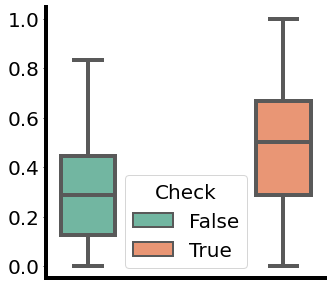

In [ ]:
# single box plot
plt.rcParams['font.size'] = '20'
plt.figure(figsize=(5,5))
display=sns.boxplot(data=Docset1,y="Min_Max_sim_bow",x='Check',hue="Check",palette='Set2',linewidth = 4) 
plt.xlabel('',fontsize=12)
plt.ylabel("",fontsize=20)
plt. xticks([])
sns.despine()
plt.show()

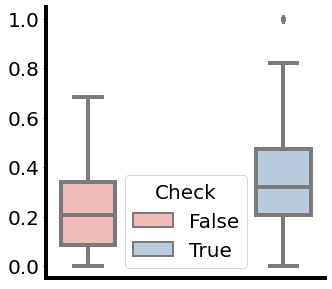

In [ ]:
# single box plot
plt.rcParams['font.size'] = '20'
plt.figure(figsize=(5,5))
display=sns.boxplot(data=Docset1,y="Min_Max_sim_TI",x='Check',hue="Check",palette='Pastel1', linewidth = 4) 
plt.xlabel('',fontsize=12)
plt.ylabel("",fontsize=12)
plt.title("",fontsize=12)
plt. xticks([])
sns.despine()
plt.show()

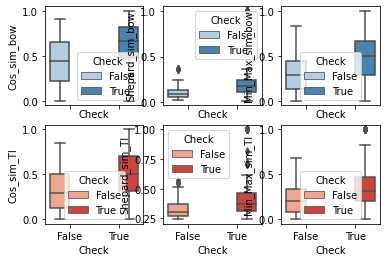

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Box plot of all the similarities Range
fig,axes=plt.subplots(2, 3,sharex=True)
plt.figure(figsize=(20,20))

sns.boxplot(data=Docset1,y="Cos_sim_bow",x='Check',hue="Check",palette='Blues',ax=axes[0,0]) 
sns.boxplot(data=Docset1,y="Shepard_sim_bow",x='Check',hue="Check",palette='Blues',ax=axes[0,1]) 
sns.boxplot(data=Docset1,y="Min_Max_sim_bow",x='Check',hue="Check",palette='Blues',ax=axes[0,2]) 
sns.boxplot(data=Docset1,y="Cos_sim_TI",x='Check',hue="Check",palette='Reds',ax=axes[1,0]) 
sns.boxplot(data=Docset1,y="Shepard_sim_TI",x='Check',hue="Check",palette='Reds',ax=axes[1,1]) 
sns.boxplot(data=Docset1,y="Min_Max_sim_TI",x='Check',hue="Check",palette='Reds',ax=axes[1,2]) 



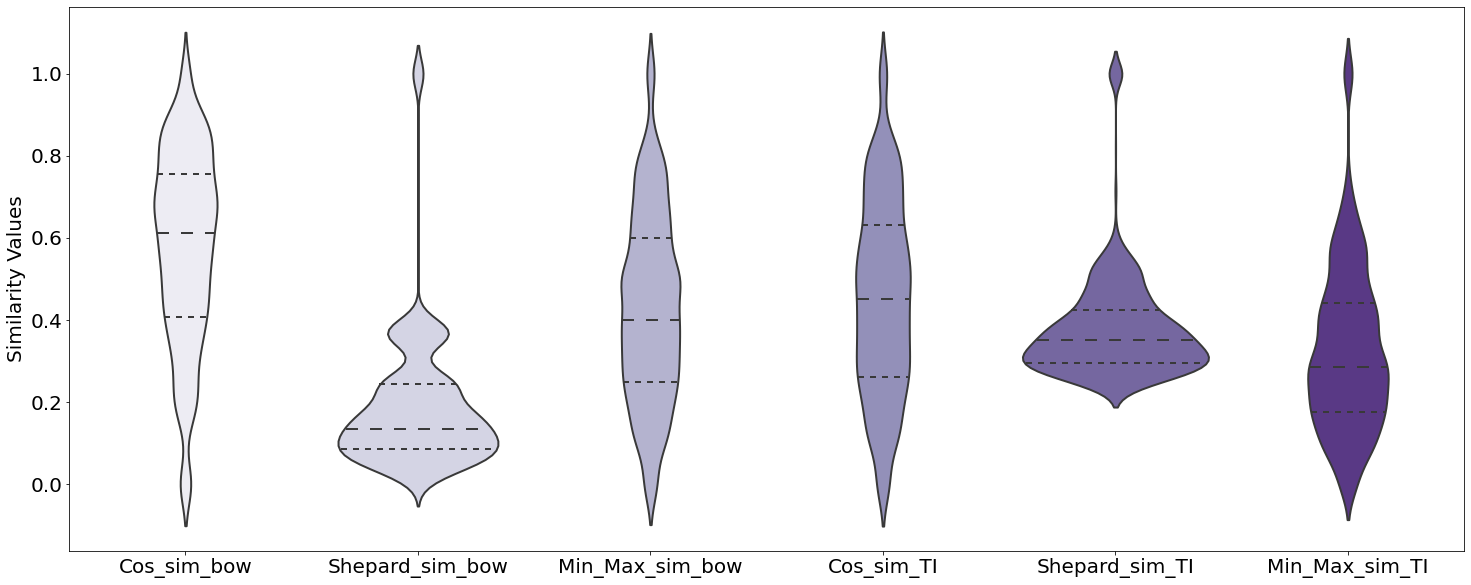

In [ ]:
# Voilin plot of all the similarities Range when texts are similar

plt.figure(figsize=(25,10))
Data = Docset1.drop(columns=['Check'])
sns.violinplot(data=Data,palette='Purples', split= True, inner = "quart", linewidth = 2 ) 
plt.xlabel('',fontsize=12)
plt.ylabel("Similarity Values",fontsize=20)
plt.title("",fontsize=12)
plt.show()


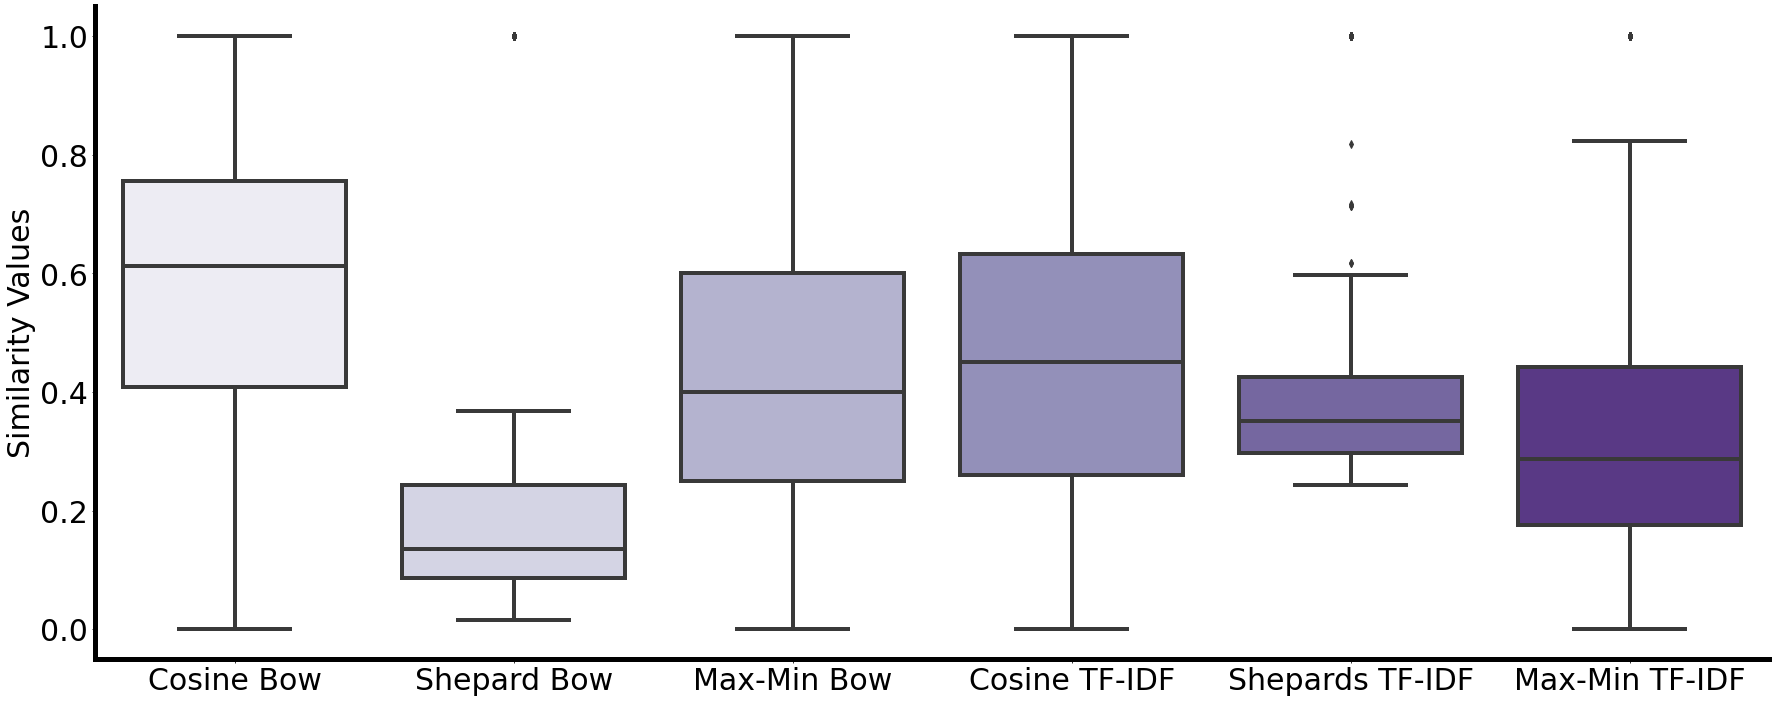

In [ ]:
# Box plot of all the similarities Range when texts are similar

plt.rcParams.update({'font.size': 30,'axes.edgecolor' : "black" ,"axes.linewidth":5})

plt.figure(figsize=(30,12))
Data = Docset1.drop(columns=['Check'])
sns.boxplot(data=Data,palette='Purples', linewidth = 4 ) 
plt.xlabel('',fontsize=12)
plt.ylabel("Similarity Values",fontsize=30)
plt.title("",fontsize=12)
plt. xticks([0,1,2,3,4,5],["Cosine Bow" , "Shepard Bow" , "Max-Min Bow" , "Cosine TF-IDF" , "Shepards TF-IDF" , "Max-Min TF-IDF" ])
sns.despine()
plt.show()

In [ ]:
Data_0.describe()

,Unnamed: 0,Check,Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
count,529.000000,529.0,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,1062.086957,0.0,0.442603,0.109919,0.308360,0.320753,0.322531,0.227203
std,608.132723,0.0,0.240601,0.068303,0.198998,0.208445,0.064606,0.154458
min,2.000000,0.0,0.000000,0.023715,0.000000,0.000000,0.243117,0.000000
25%,525.000000,0.0,0.223607,0.059106,0.125000,0.127360,0.266844,0.086689
50%,1042.000000,0.0,0.447214,0.086338,0.285714,0.296672,0.305433,0.204736
75%,1590.000000,0.0,0.654654,0.135335,0.444444,0.503103,0.369024,0.338223
max,2139.000000,0.0,0.912871,0.367879,0.833333,0.846647,0.574756,0.683891


In [ ]:
Data_1.describe()

,Unnamed: 0,Check,Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
count,1613.000000,1613.0,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,1073.259144,1.0,0.623079,0.211929,0.470729,0.497925,0.399049,0.359038
std,622.006258,0.0,0.215828,0.174807,0.224185,0.229913,0.137902,0.203791
min,0.000000,1.0,0.000000,0.016194,0.000000,0.000000,0.243117,0.000000
25%,546.000000,1.0,0.471405,0.106878,0.285714,0.318784,0.311227,0.204736
50%,1082.000000,1.0,0.666667,0.176921,0.500000,0.503103,0.369024,0.319450
75%,1611.000000,1.0,0.816497,0.243117,0.666667,0.706078,0.464539,0.473355
max,2141.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Box plot of all the similarities Range when texts are not similar
plt.figure(figsize=(15,5))
sns.boxplot(data=Data_0.drop(columns=['Check']),palette='Dar') 

ValueError: ignored

<Figure size 1080x360 with 0 Axes>

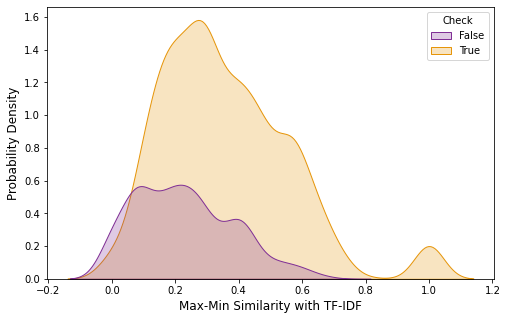

In [ ]:
# density Graphs for each 
plt.figure(figsize=[8,5],facecolor='White', edgecolor='Black', frameon=False)
sns.kdeplot(data=Docset1,x='Min_Max_sim_bow',hue='Check',fill=True,palette= 'Set1')
plt.xlabel("Max-Min Similarity with Bow",fontsize=12)
plt.ylabel("Probability Density",fontsize=12)
plt.show()


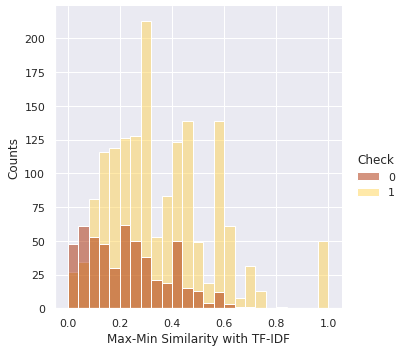

In [ ]:
graph(Docset1,'Min_Max_sim_TI','Check','Max-Min Similarity with TF-IDF','Counts')